In [1]:
# importing libraries
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
df = pd.read_csv("/content/Telco_Customer_Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# Droping unnecessary column
df.drop(["customerID"], axis=1, inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
# Finding missing values
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# Finding duplicate values
df.duplicated().sum()

22

In [6]:
# Handling duplicate values
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
# data type of each column
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df["TotalCharges"]

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7021, dtype: object

Here,we can see that **TotalCharges** column values are object.But it values should have ***float64***

In [9]:
# Converting "TotalCharges" column's object values to number
pd.to_numeric(df["TotalCharges"])

ValueError: ignored

Here,we can see that, some values are empty string. Those are not convert to number.So we need to tackle those.

In [10]:
# getting df,those "TotalCharges" columns values are not empty string
df1 = df[df["TotalCharges"] != " "]
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [11]:
# Now converting "TotalCharges" column's object values to number
df1["TotalCharges"] = pd.to_numeric(df1["TotalCharges"])
df1["TotalCharges"].dtypes

<ipython-input-11-a7a317e7e2c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["TotalCharges"] = pd.to_numeric(df1["TotalCharges"])


dtype('float64')

In [12]:
# printing column with unique value, which column values are objects
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes == "object":
      print(f"{column}: {df[column].unique()}")

In [13]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [14]:
# converting "No internet service" or "No phone service" to "No"
df1.replace("No internet service", "No", inplace=True)
df1.replace("No phone service", "No", inplace=True)

<ipython-input-14-0e52d1d53fca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No internet service", "No", inplace=True)
<ipython-input-14-0e52d1d53fca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No phone service", "No", inplace=True)


In [15]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [16]:
# label encodding for those columns, those are containing "Yes" of "No" value
yes_no_column = ["Partner", "Dependents", "PhoneService" ,"MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "Churn"]

for col in yes_no_column:
  df1[col].replace({"No":0, "Yes":1}, inplace=True)

<ipython-input-16-a84eaecda802>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({"No":0, "Yes":1}, inplace=True)


In [17]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [18]:
# Label Encodding for "gender" column
df1.gender.replace({"Female":0, "Male":1}, inplace=True)

<ipython-input-18-6f23b132284b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.gender.replace({"Female":0, "Male":1}, inplace=True)


In [19]:
print_unique_col_values(df1)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [20]:
# One hot encodding for rest columns
df2 = pd.get_dummies(data = df1, columns=["InternetService", "Contract", "PaymentMethod"], drop_first=True)
df2.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [21]:
# Here, we can see that only 3 columns("tenure", "MonthlyCharges", "TotalCharges") value are continuous.so scaling those column
cols_to_scale = ["tenure", "MonthlyCharges", "TotalCharges"]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])


In [22]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,0.115423,0.001275,0,0,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,0.385075,0.215867,0,0,0,1,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,0.354229,0.010310,1,0,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,0.239303,0.210241,0,0,0,1,0,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0.521891,0.015330,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,1,1,0,1,...,0.662189,0.227521,0,0,0,1,0,0,0,1
7039,0,0,1,1,1.000000,1,1,0,1,1,...,0.845274,0.847461,0,1,0,1,0,1,0,0
7040,0,0,1,1,0.140845,0,0,1,0,0,...,0.112935,0.037809,0,0,0,0,0,0,1,0
7041,1,1,1,0,0.042254,1,1,0,0,0,...,0.558706,0.033210,1,1,0,0,0,0,0,1


In [23]:
df2["Churn"].value_counts()

0    5153
1    1857
Name: Churn, dtype: int64

In [24]:
# Handling Imbalenced dataset
max_num = 1857

churn_no = df2[df2["Churn"] == 0].sample(max_num)
churn_yes = df2[df2["Churn"] == 1].sample(max_num)

df3 = pd.concat([churn_no, churn_yes], axis=0)
df3

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6646,1,0,1,1,0.704225,1,0,0,0,0,...,0.011443,0.112964,0,0,1,1,0,0,0,1
3126,0,0,1,1,0.352113,0,0,1,1,0,...,0.204975,0.116126,0,0,0,0,0,1,0,0
193,0,0,1,1,1.000000,1,1,1,1,1,...,0.909950,0.935899,0,1,0,0,1,1,0,0
3256,1,0,1,1,0.845070,1,0,1,1,1,...,0.663184,0.605320,0,0,0,1,0,0,0,0
5935,1,1,0,0,0.169014,1,0,0,1,0,...,0.414428,0.088801,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890,0,1,1,1,0.647887,1,0,0,0,0,...,0.520398,0.379697,1,1,0,0,0,0,0,0
5573,0,1,0,0,0.000000,1,0,0,0,0,...,0.513433,0.005891,1,1,0,0,0,0,1,0
1822,0,0,0,1,0.422535,1,1,0,0,0,...,0.679602,0.309093,1,1,0,0,0,1,0,0
5638,1,0,0,0,0.000000,1,0,0,0,0,...,0.016915,0.000133,1,0,1,0,0,0,1,0


In [25]:
# Extracting Dependent and Independent variables
x = df2.drop(["Churn"], axis=1)
y = df2["Churn"]

In [26]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0.115423,0.001275,0,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,0,0.385075,0.215867,0,0,1,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0.354229,0.010310,0,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,0,0.239303,0.210241,0,0,1,0,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,1,0.521891,0.015330,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,1,1,0,1,...,1,0.662189,0.227521,0,0,1,0,0,0,1
7039,0,0,1,1,1.000000,1,1,0,1,1,...,1,0.845274,0.847461,1,0,1,0,1,0,0
7040,0,0,1,1,0.140845,0,0,1,0,0,...,1,0.112935,0.037809,0,0,0,0,0,1,0
7041,1,1,1,0,0.042254,1,1,0,0,0,...,1,0.558706,0.033210,1,0,0,0,0,0,1


In [27]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7010, dtype: int64

In [28]:
# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2023)

In [29]:
print(x.shape, x_train.shape, x_test.shape)

(7010, 23) (5608, 23) (1402, 23)


In [30]:
# adding artificial neural network
model = keras.Sequential([

    # adding 20 hidden layers
    keras.layers.Dense(20, input_shape=(23,), activation="relu"),
    # adding 10 hidden layers
    keras.layers.Dense(10, activation="relu"),
    # adding final 1 output layers
    keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# fitting the model
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 2ms/step - loss: 0.5359 - accuracy: 0.7304
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4414 - accuracy: 0.7689
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4289 - accuracy: 0.7894
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.7933
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4212 - accuracy: 0.7956
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.7956
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4179 - accuracy: 0.8001
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.8006
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8042
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4143 - accura

In [31]:
# Evaluate the model
model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4472 - accuracy: 0.7889


[0.4472159147262573, 0.788873016834259]

In [32]:
# prediction for x_test
y_predicted = model.predict(x_test)

44/44 [==============================] - 0s 2ms/step


In [33]:
# Value grater than 0.5 is 1 or less than 0.5 is 0
y_predicted_labels = []

for x in y_predicted:
  if x > 0.5:
    y_predicted_labels.append(1)
  else:
    y_predicted_labels.append(0)

In [34]:
# Classification report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_predicted_labels)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1031
           1       0.62      0.51      0.56       371

    accuracy                           0.79      1402
   macro avg       0.73      0.70      0.71      1402
weighted avg       0.78      0.79      0.78      1402



In [35]:
# Classification report
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted_labels)
print(cm)

[[915 116]
 [180 191]]


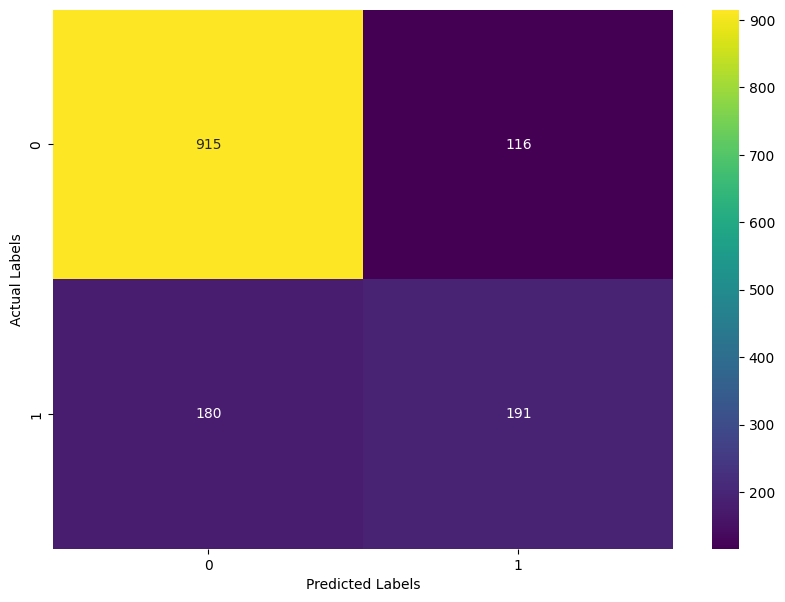

In [36]:
# Visualizing confusion matrix
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cbar=True, cmap="viridis")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()